### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

### Cargar librerías

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Leer imágenes
imaG = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/LinfoG.jpg")
imaP = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/LinfoP.jpg")

#Cambio de espacio de color
img=cv2.cvtColor(imaG,cv2.COLOR_BGR2RGB)
template=cv2.cvtColor(imaP,cv2.COLOR_BGR2RGB)

img2 = img.copy()
w, h, _ = template.shape

In [6]:
#funcion para graficar imágenes
def grafica2(ima1,ima2):
    plt.figure(figsize=(15,9))
    plt.subplot(1,2,1)
    plt.imshow(ima1); plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(ima2); plt.axis('off')

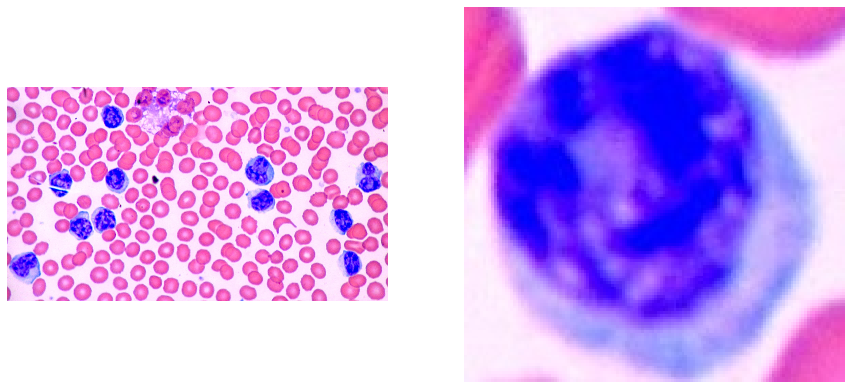

In [7]:
grafica2(img,template)

### Detección de objetos por emparejamiento
El emparejamiento de plantillas (o template matching en inglés) es un método para buscar y encontrar la ubicación de una imagen de plantilla en una imagen más grande. 

OpenCV viene con la función cv2.matchTemplate() para este propósito. 

La función se desliza a través de la image, comparando las regiones solapadas de tamaño $wxh$ contra la plantilla utilizando el método especificado y almacenando los resultados de la comparación en argumento de salida. 

Aquí están las fórmulas para los métodos de comparación disponibles ($I$ denota la image, $T$ la plantilla y $R$ el resultado). La suma se realiza sobre la plantilla y/o la región de la imagen: ${x}'= 0 ... w-1$, ${y}' = 0 ... h-1$

Método cv2.TM_SQDIFF:
$$R(x,y)=\sum_{{x}'{y}'}[T({x}',{y}')-I(x+{x}',y+{y}')]^2$$

Los demás metodos se pueden encontrar en el siguiente enlace:
https://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html

Nota: El resultado arrojado por matchTemplate() basado en los métodos 'cv2.TM_SQDIFF' y 'cv2.TM_SQDIFF_NORMED' son inversos, es decir, los valores decaen cuando encuentran una similaridad alta entre la región y la plantilla. 

In [ ]:
# Todos los 6 métodos a comparar en un lista
methods = ['cv2.TM_CCOEFF',
           'cv2.TM_CCOEFF_NORMED',
           'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF',
           'cv2.TM_SQDIFF_NORMED']

In [ ]:
# Aplica el emparejamiento de plantillas
res = cv2.matchTemplate(img,template,eval(methods[3]))

#Buscar máximo y mínimo
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

#rectangulos
Rmin = (min_loc[0] + w, min_loc[1] + h)
Rmax = (max_loc[0] + w, max_loc[1] + h)

#dibujar rectangulos
cv2.rectangle(img, max_loc, Rmax, (0,255,0), 10)
grafica2(res,img)